# Marketing Campaign

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Dataset
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


## Data Preperation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Handling Missing Values
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Feature Engineering

In [ ]:
df['Age'] = 2022 - df['Year_Birth'] #Membuat kolom Age
df['Total_Kids'] = df['Kidhome'] + df['Teenhome'] #Membuat kolom Total_Kids
df['Is_Parent'] = np.where(df['Total_Kids'] > 0, 1, 0) #Define Is_Parent
df['Total_Purchases'] = df['NumDealsPurchases']+ df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] #Membuat kolom Total_Purchase
df['Total_Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] #Membuat kolom Total_Spent

df['Total_Acc_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] #Membuat kolom Total_Acc_Campaign
df['Yrs_Join_Cust'] = 2022 - df['Dt_Customer'].str.slice(6,10,1).astype("int16") #Membuat kolom Yrs_Join_Cust

def convertion(x,y) :
       if y == 0 :
         return 0
       else : 
         return x/y

df['Convertion_Rate'] = df.apply(lambda x: convertion(x['Total_Purchases'],x['NumWebVisitsMonth']), axis=1) #Membuat kolom Convertion_Rate

In [ ]:
# Drop outliers data
df = df[df['Income'] < 600000000]
df = df[df['Age'] < 120]

### Drop Kolom Outdated

In [ ]:
df.drop(columns=['Unnamed: 0','ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','AcceptedCmp1','AcceptedCmp2',
                 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Recency              2212 non-null   int64  
 4   MntCoke              2212 non-null   int64  
 5   MntFruits            2212 non-null   int64  
 6   MntMeatProducts      2212 non-null   int64  
 7   MntFishProducts      2212 non-null   int64  
 8   MntSweetProducts     2212 non-null   int64  
 9   MntGoldProds         2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  Age                  2212 non-null   i

## EDA

### Bivariate Analysis

In [ ]:
numeric = ['Income','Recency','Total_Kids','Total_Purchases','Total_Spent','Total_Acc_Campaign','Convertion_Rate', 'Age','Yrs_Join_Cust','MntCoke',
           'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
           'NumStorePurchases','NumWebVisitsMonth']
categoric = ['Education','Marital_Status','Is_Parent']

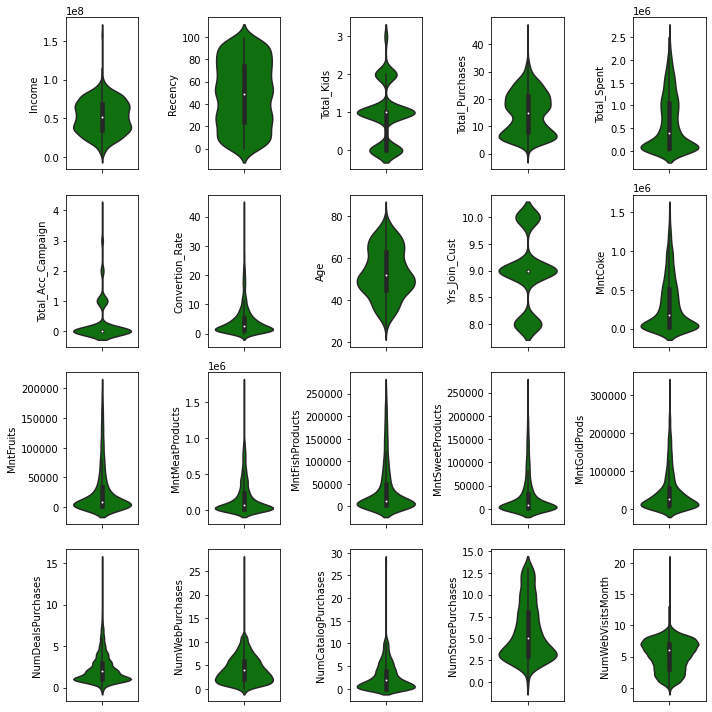

In [ ]:
#Violin Plot

plt.figure(figsize=(10,10))
for i in range(0, len(numeric)):
    plt.subplot(4, 5, i+1)
    sns.violinplot(y=df[numeric[i]], color='green', orient='v')
    plt.tight_layout()

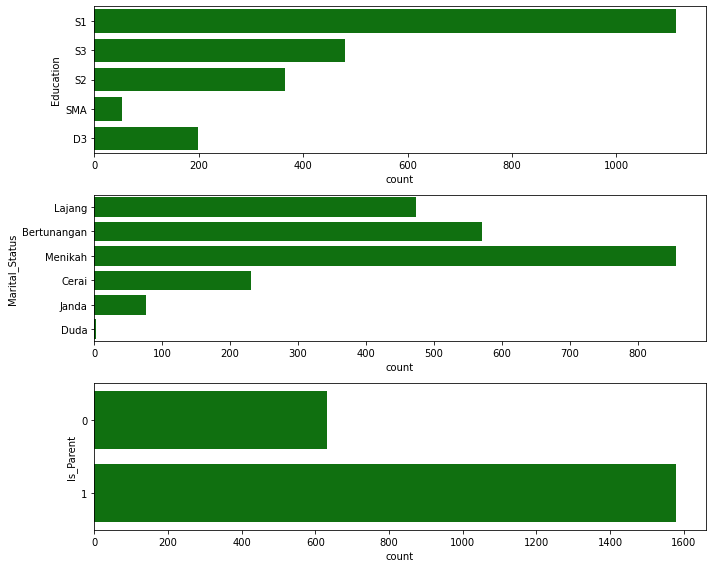

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0, len(categoric)):
    plt.subplot(3, 1, i+1)
    sns.countplot(y=df[categoric[i]], color='green', orient='h')
    plt.tight_layout()

### Multivariate Analysis

In [ ]:
#Label Encoding kolom Education
df1 = df.copy()

mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

mapping_marital = {
    'Lajang' : 0,
    'Bertunangan' : 1,
    'Menikah' : 2,
    'Cerai' : 3,
    'Janda' : 4,
    'Duda' : 5
}


df1['Education'] = df1['Education'].map(mapping_education)
df1['Marital_Status'] = df1['Marital_Status'].map(mapping_marital)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Marital_Status       2212 non-null   int64  
 2   Income               2212 non-null   float64
 3   Recency              2212 non-null   int64  
 4   MntCoke              2212 non-null   int64  
 5   MntFruits            2212 non-null   int64  
 6   MntMeatProducts      2212 non-null   int64  
 7   MntFishProducts      2212 non-null   int64  
 8   MntSweetProducts     2212 non-null   int64  
 9   MntGoldProds         2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  Age                  2212 non-null   i

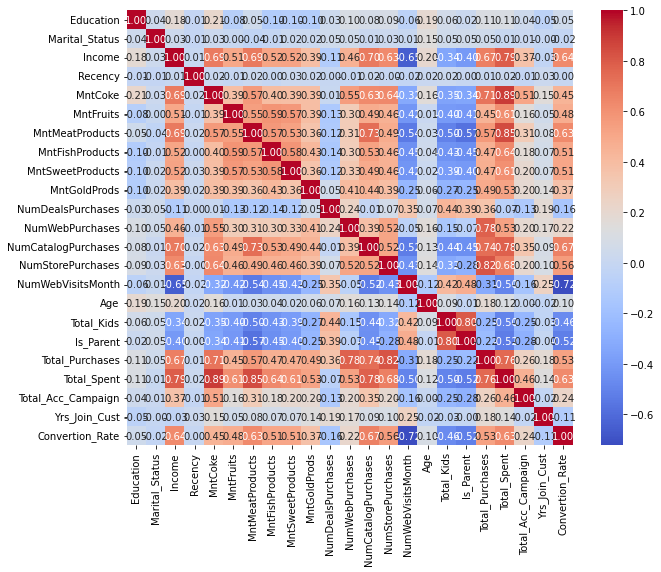

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Text(0.5, 1.0, 'Income and Convertion Rate Correlation')

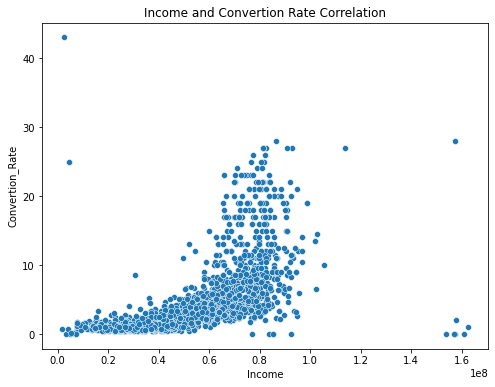

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Convertion_Rate', data=df)
plt.title('Income and Convertion Rate Correlation')

Text(0.5, 1.0, 'Education and Convertion Rate Correlation')

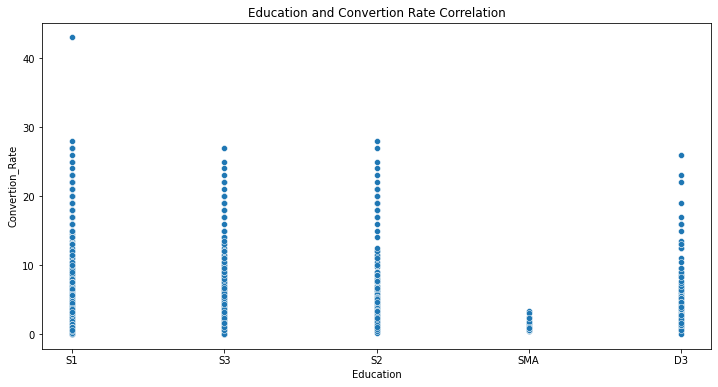

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Education', y='Convertion_Rate', data=df)
plt.title('Education and Convertion Rate Correlation')

Text(0.5, 1.0, 'Total Purchases and Convertion Rate Correlation')

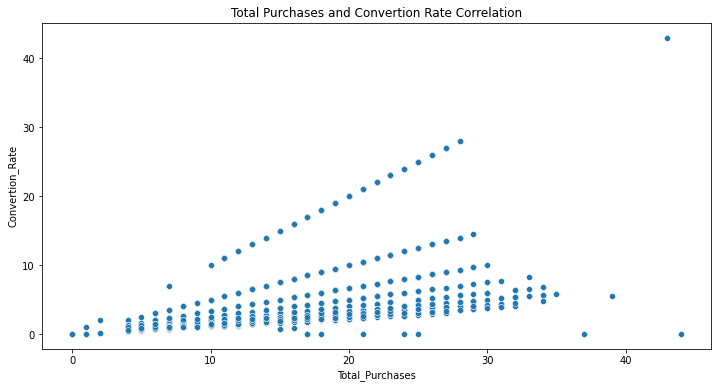

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total_Purchases', y='Convertion_Rate', data=df)
plt.title('Total Purchases and Convertion Rate Correlation')

Text(0.5, 1.0, 'Total Spent and Convertion Rate Correlation')

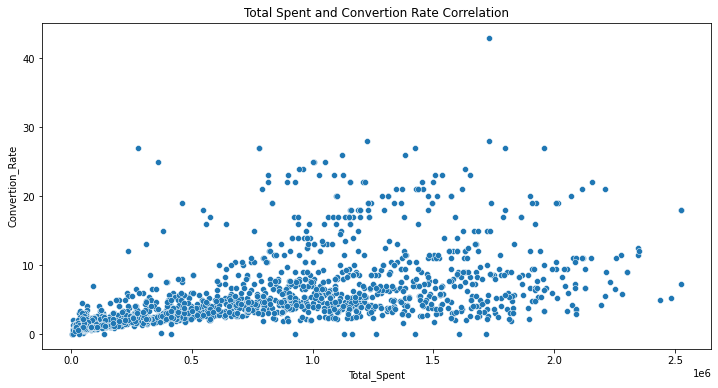

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total_Spent', y='Convertion_Rate', data=df)
plt.title('Total Spent and Convertion Rate Correlation')

Text(0.5, 1.0, 'Age and Convertion Rate Correlation')

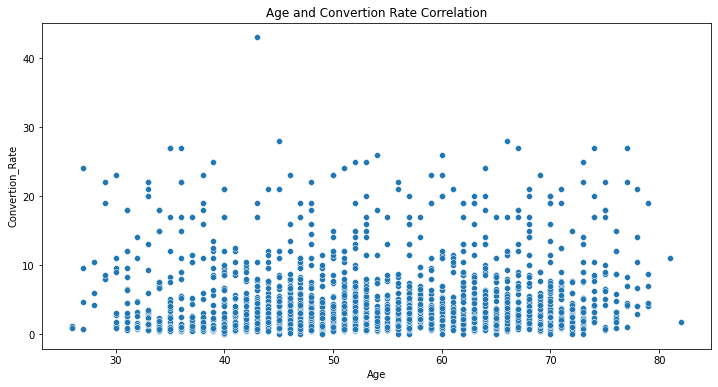

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Convertion_Rate', data=df)
plt.title('Age and Convertion Rate Correlation')

Text(0.5, 1.0, 'Total Kids and Spent Correlation')

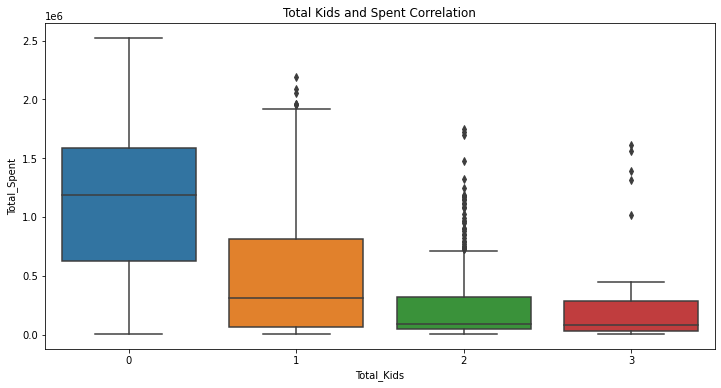

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Kids', y='Total_Spent', data=df)
plt.title('Total Kids and Spent Correlation')

Text(0.5, 1.0, 'Marital Status and Convertion Rate Correlation')

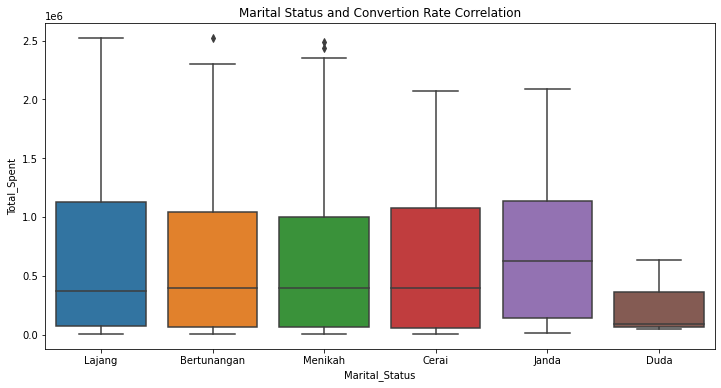

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Marital_Status', y='Total_Spent', data=df)
plt.title('Marital Status and Convertion Rate Correlation')

Text(0.5, 1.0, 'Total_Acc_Campaign and Convertion Rate Correlation')

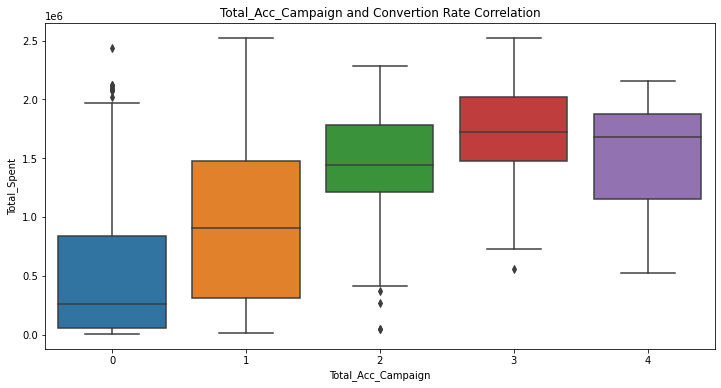

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Acc_Campaign', y='Total_Spent', data=df)
plt.title('Total_Acc_Campaign and Convertion Rate Correlation')

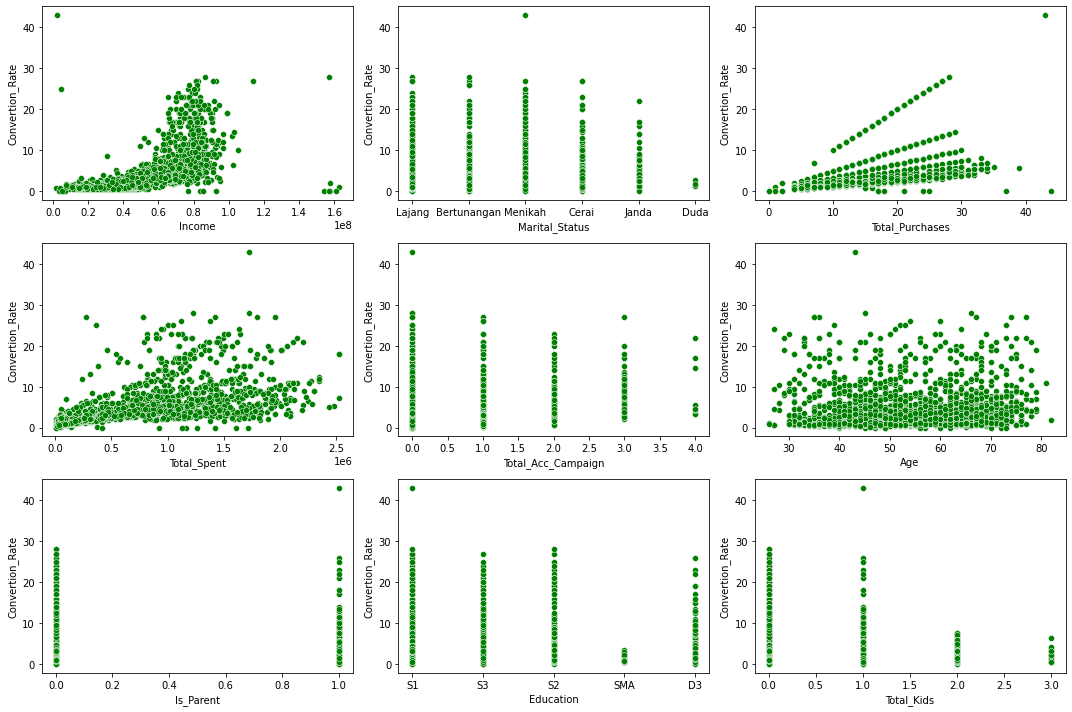

In [ ]:
graph = ['Income','Marital_Status','Total_Purchases','Total_Spent','Total_Acc_Campaign','Age','Is_Parent','Education','Total_Kids']

plt.figure(figsize=(15, 10))
for i in range(0, len(graph)):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[graph[i]], y=df['Convertion_Rate'], color='green')
    plt.tight_layout()

plt.show()

### Standarisasi

In [ ]:
df_std = df1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for col in numeric:
    df_std[col] = ss.fit_transform(df_std[[col]])

In [ ]:
df_std

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Age,Total_Kids,Is_Parent,Total_Purchases,Total_Spent,Total_Acc_Campaign,Yrs_Join_Cust,Convertion_Rate
0,2,0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-0.555814,0.692181,1.018352,-1.264598,0,1.317945,1.676245,-0.439160,1.499086,-0.167565
1,2,0,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.171160,-0.132545,1.274785,1.404572,1,-1.159273,-0.963297,-0.439160,-1.417341,-0.652955
2,2,1,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,1.290224,-0.544908,0.334530,-1.264598,0,0.796425,0.280110,-0.439160,0.040872,0.176008
3,2,1,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.555814,0.279818,-1.289547,0.069987,1,-0.898513,-0.920135,-0.439160,-1.417341,-0.625664
4,4,2,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.059532,-0.132545,-1.033114,0.069987,1,0.535666,-0.307562,-0.439160,-1.417341,-0.120781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,2,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,...,-0.555814,-0.132545,0.163575,0.069987,1,0.405286,1.218061,-0.439160,0.040872,-0.161717
2236,4,1,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,...,-0.248141,0.692181,1.958607,2.739158,1,0.926805,-0.271040,1.032691,-1.417341,-0.255286
2237,2,3,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,...,2.213242,0.279818,-1.033114,-1.264598,0,0.535666,1.052052,1.032691,-1.417341,-0.250413
2238,3,1,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,...,1.290224,-0.957271,1.103830,0.069987,1,1.057185,0.391336,-0.439160,-1.417341,0.670657


## Plotting

In [ ]:
df_cluster = df_std.copy()

In [ ]:
#df_cluster.describe()

In [ ]:
# Menghitung jumlah komponen

from sklearn.decomposition import PCA

pca = PCA(n_components=len(df_cluster.columns))
pca.fit(df_cluster)

# DataFrame baru memiliki 23 dimensi

PCA(n_components=23)

In [ ]:
pca_data = pd.DataFrame(pca.transform(df_cluster), columns=["PC"+str(i+1) for i in range(len(df_cluster.columns))]).iloc[:, :23]
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,4.169461,0.716713,2.385352,0.224612,-0.487050,-0.559482,-1.751799,-1.240115,0.492831,-1.006617,...,0.627213,0.280723,0.258284,-0.741486,0.590253,-0.060489,0.211609,-0.204228,-5.421319e-19,-2.954797e-16
1,-2.931869,-0.898183,-1.090821,-0.314973,-1.504910,0.403208,0.442142,-1.615312,0.701114,-0.681333,...,0.365779,-0.129946,-0.240701,-0.099846,0.244330,0.034188,-0.027980,-0.123072,5.036360e-16,-1.121592e-16
2,2.015097,-0.226663,0.406517,-0.270526,-0.246899,0.980354,-0.631496,-0.731312,-1.446658,0.487913,...,-0.062490,0.752654,0.689279,0.514249,0.230451,-0.008974,-0.336750,-0.348614,-3.094031e-16,1.227621e-16
3,-2.850465,-1.238077,0.260484,0.194576,-0.496522,1.097528,0.891075,0.535152,-0.524254,0.063686,...,-0.093395,0.190143,-0.306203,-0.078580,0.001645,-0.002881,0.286723,0.141474,5.159023e-16,1.648603e-16
4,-0.082788,0.636691,-0.885026,-0.611948,-0.983577,-1.027338,0.862153,2.008140,-1.030336,-0.537060,...,-0.499336,0.115687,0.376134,0.357230,0.535733,0.136797,-0.143845,0.174705,-5.542208e-16,-1.066251e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.503119,1.097237,1.430829,-0.935230,0.893437,0.052822,0.628234,-1.430243,-1.328203,0.387396,...,1.745618,-0.947631,-1.273305,0.138690,0.204316,-0.821120,0.331761,0.173203,2.354405e-16,2.726369e-16
2208,-0.821924,3.573074,-2.678682,0.069852,-1.527864,0.054848,1.431391,-0.860874,0.312482,-1.458632,...,-0.082143,-0.025678,0.590190,0.276972,-0.309234,-0.150257,-0.195011,-0.560102,-1.527147e-16,8.300556e-17
2209,1.766325,-0.615903,-0.526632,0.753089,1.458357,-1.229178,1.577910,1.205759,-1.181843,0.458506,...,-1.513102,0.407391,-1.556484,-0.408312,0.270513,0.366097,-0.148763,-0.386846,-5.787904e-16,-1.779725e-16
2210,2.108665,0.195747,-1.465142,-0.825054,-1.168361,1.660835,0.099495,-0.672065,-0.506867,0.267236,...,0.152550,0.544806,-0.031939,-0.444147,0.124074,0.343521,0.151761,0.222795,-6.566874e-16,5.950872e-17


In [ ]:
vis_data = pca_data[['PC1','PC2','PC3']]
vis_data

,PC1,PC2,PC3
0,4.169461,0.716713,2.385352
1,-2.931869,-0.898183,-1.090821
2,2.015097,-0.226663,0.406517
3,-2.850465,-1.238077,0.260484
4,-0.082788,0.636691,-0.885026
...,...,...,...
2207,2.503119,1.097237,1.430829
2208,-0.821924,3.573074,-2.678682
2209,1.766325,-0.615903,-0.526632
2210,2.108665,0.195747,-1.465142


In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_data) 
    kmeanModel.fit(pca_data)     
      
    distortions.append(sum(np.min(cdist(df_cluster, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_cluster, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_cluster.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

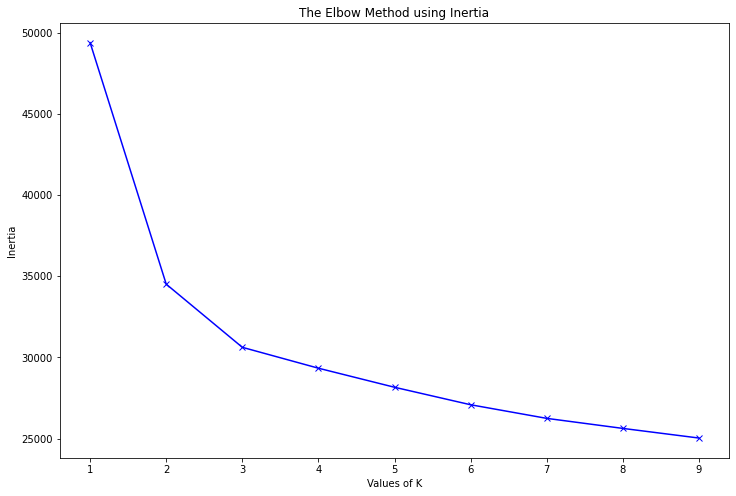

In [ ]:
# Ploting

plt.figure(figsize=(12,8))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
idf = pd.DataFrame(inertias)
(idf - idf.shift(-1)) / idf * 100

,0
0,30.114196
1,11.265718
2,4.200568
3,3.999313
4,3.824258
5,3.094526
6,2.355154
7,2.315090
8,NaN


Jumlah cluster yang optimum ada di antara 4 dan 5 cluster

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,10

pd.set_option('display.max_columns',None)

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
  clusters_range = range(2,10)
  results = []

  for i in clusters_range:
    km = KMeans(n_clusters = i, random_state=0)
    cluster_labels = km.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    results.append([i, silhouette_avg])

  result = pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
  pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

  plt.figure()
  sns.heatmap(pivot_km, annot=True, linewidth=1, fmt='.3f')
  plt.tight_layout()
  plt.title('Silhouette Score and K-Means Clustering')
  plt.show()

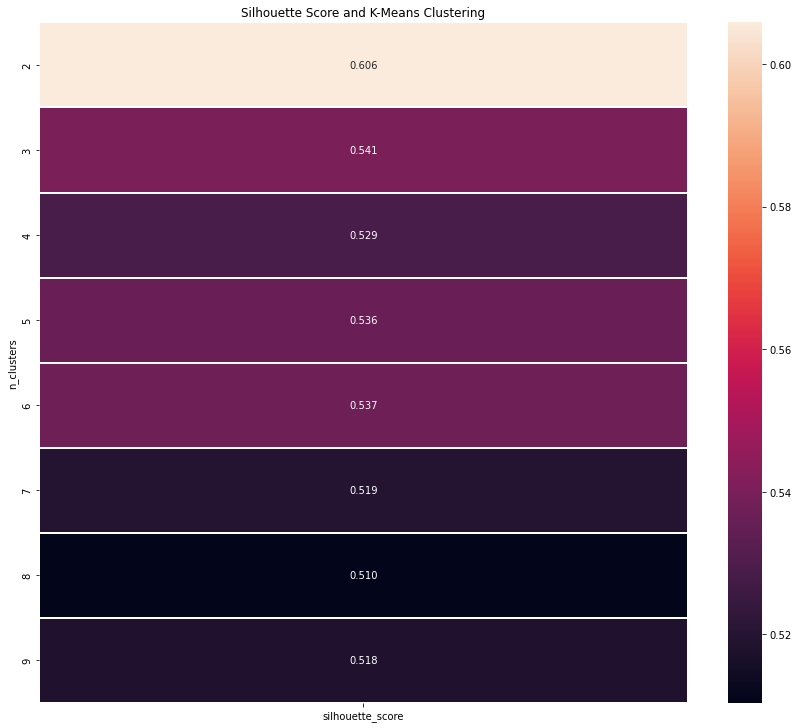

In [ ]:
visualize_silhouette_layer(pca_data)

## Visualization

In [ ]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(vis_data)

In [ ]:
vis_data['segment'] = kmeans5.labels_
vis_data

,PC1,PC2,PC3,segment
0,4.169461,0.716713,2.385352,0
1,-2.931869,-0.898183,-1.090821,3
2,2.015097,-0.226663,0.406517,4
3,-2.850465,-1.238077,0.260484,1
4,-0.082788,0.636691,-0.885026,2
...,...,...,...,...
2207,2.503119,1.097237,1.430829,4
2208,-0.821924,3.573074,-2.678682,2
2209,1.766325,-0.615903,-0.526632,4
2210,2.108665,0.195747,-1.465142,4


In [ ]:
km = KMeans(n_clusters=5)
km_results = km.fit_predict(pca_data)
km_results

array([0, 4, 0, ..., 2, 3, 4], dtype=int32)

In [ ]:
vis_data['segment'] = km_results
df['segment'] = km_results
df['segment'] = km_results

In [ ]:
dict(
    round(
        df[df['segment']==0]["Marital_Status"].value_counts() /
        df[df['segment']==0]["Marital_Status"].shape[0]
        ,2)
)

{'Bertunangan': 0.27,
 'Cerai': 0.1,
 'Janda': 0.05,
 'Lajang': 0.23,
 'Menikah': 0.35}

Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. Indeed, they both represent 23% and 22% of the customers.


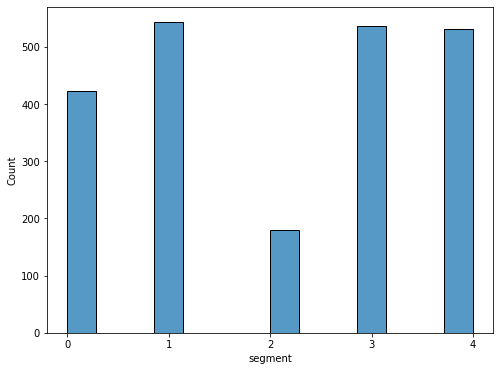

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(range(5))
plt.grid(False)
sns.histplot(df['segment'])
print(f"Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. \
Indeed, they both represent {df['segment'].value_counts()[1] / df.shape[1]:.0f}% and {df['segment'].value_counts()[3] / df.shape[1]:.0f}% of the customers.");

In [ ]:
vis_data['segment'].value_counts().sort_index()

# terdapat 4 cluster dengan cluster terbanyak pada cluster 1

0    422
1    543
2    180
3    536
4    531
Name: segment, dtype: int64

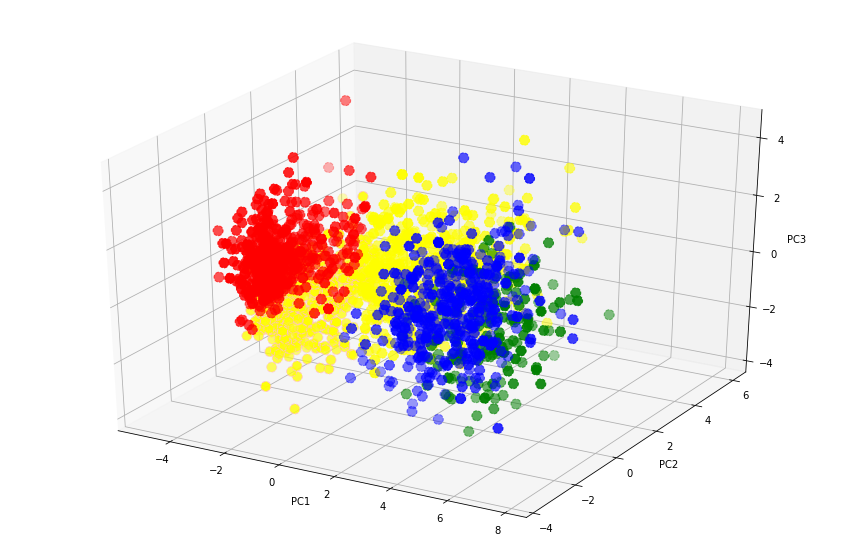

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vis_data['PC1'][vis_data.segment == 0], vis_data['PC2'][vis_data.segment == 0], vis_data['PC3'][vis_data.segment == 0], c='blue', s=100, edgecolor='blue',linestyle='--')
ax.scatter(vis_data['PC1'][vis_data.segment == 1], vis_data['PC2'][vis_data.segment == 1], vis_data['PC3'][vis_data.segment == 1], c='red', s=100, edgecolor='red',linestyle='--')
ax.scatter(vis_data['PC1'][vis_data.segment == 2], vis_data['PC2'][vis_data.segment == 2], vis_data['PC3'][vis_data.segment == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(vis_data['PC1'][vis_data.segment == 3], vis_data['PC2'][vis_data.segment == 3], vis_data['PC3'][vis_data.segment == 3], c='yellow', s=100, edgecolor='yellow',linestyle='--')
ax.scatter(vis_data['PC1'][vis_data.segment == 4], vis_data['PC2'][vis_data.segment == 4], vis_data['PC3'][vis_data.segment == 4], c='yellow', s=100, edgecolor='pink',linestyle='--')

plt.xlabel('PC1')
plt.ylabel("PC2")
ax.set_zlabel('PC3')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(vis_data, x='PC1', y='PC2', z='PC3',
              color='segment')
fig.show()

In [ ]:
segment_details = {}

for segment in range(4):
    segment_details[str(segment)] = {}
    for column in df.columns[2:-1]:
        segment_details[str(segment)][column] = round(df[df['segment']==segment][column].mean(),2)

In [ ]:
for segment in range(4):
    for column in df.columns[:2]: 
        column_results = dict(
    round(
        df[df['segment']==segment][column].value_counts() /
        df[df['segment']==segment][column].shape[0]
        ,2)
)
        for result in column_results:
            segment_details[str(segment)][result] = column_results[result]

In [ ]:
pd.DataFrame(segment_details)

,0,1,2,3
Income,73332585.31,28762491.71,81847422.22,57756207.09
Recency,49.77,47.62,49.69,47.85
MntCoke,474191.94,26500.92,920800.00,481973.88
MntFruits,73571.09,6697.97,52922.22,22311.57
MntMeatProducts,419841.23,22591.16,501227.78,141843.28
MntFishProducts,105026.07,10863.72,79177.78,30022.39
MntSweetProducts,73388.63,6616.94,59733.33,23167.91
MntGoldProds,80957.35,18305.71,69427.78,62186.57
NumDealsPurchases,1.39,1.78,1.22,3.95
NumWebPurchases,4.97,2.04,5.66,6.65


In [ ]:
object_cols = ['Education', 'Marital_Status']
num_cols = list(df.columns[2:-1])

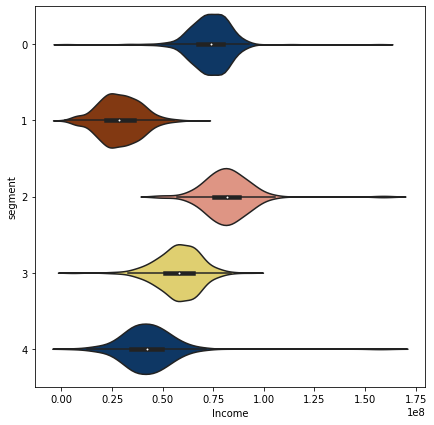

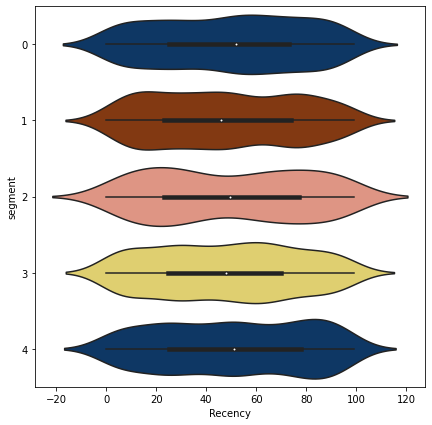

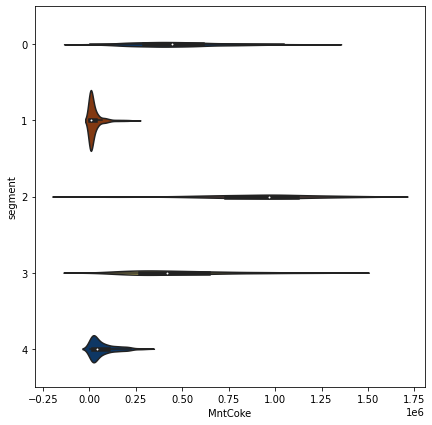

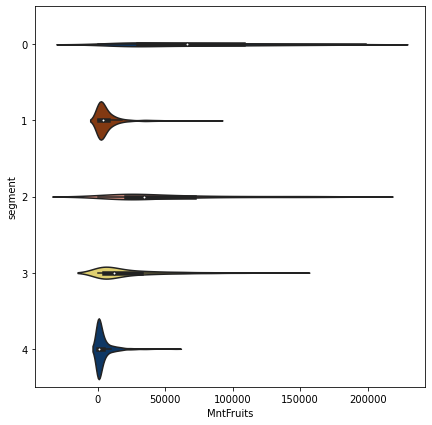

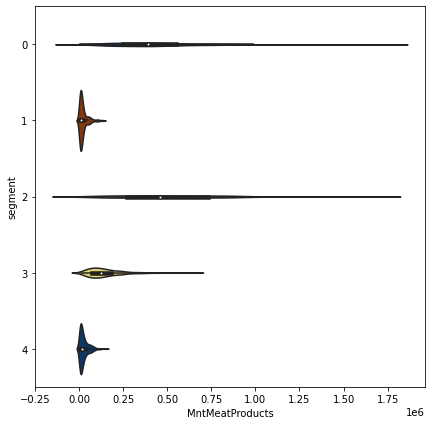

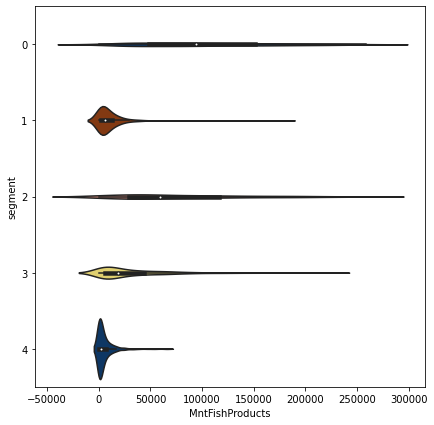

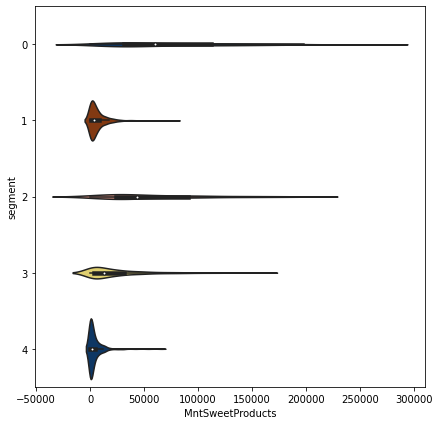

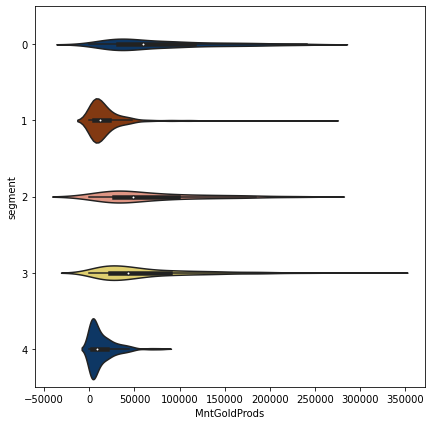

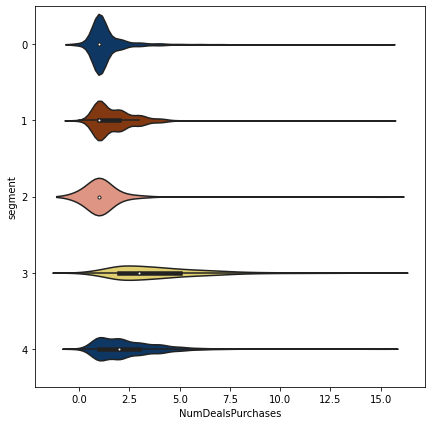

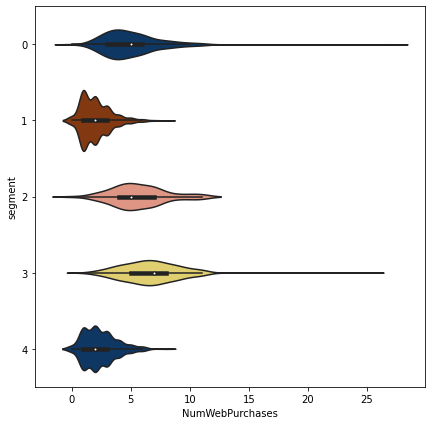

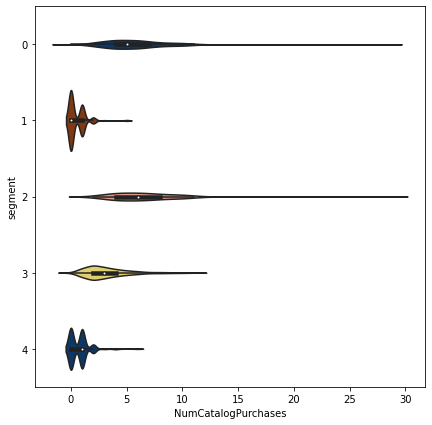

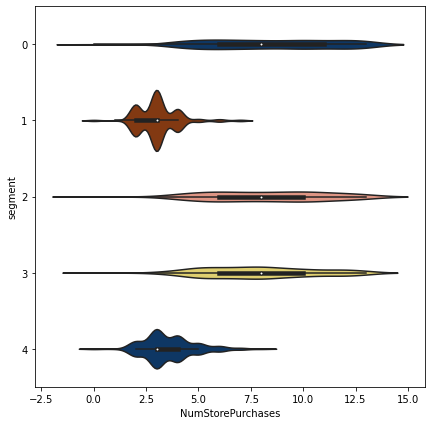

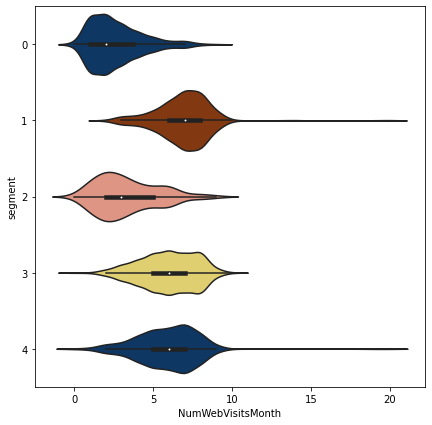

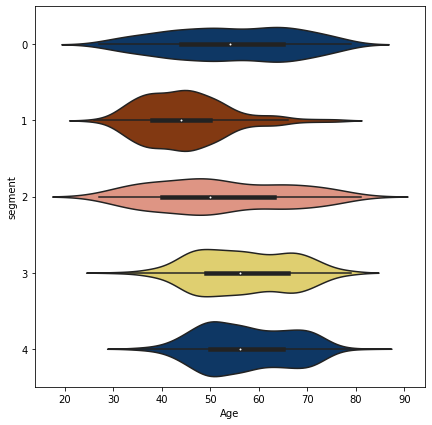

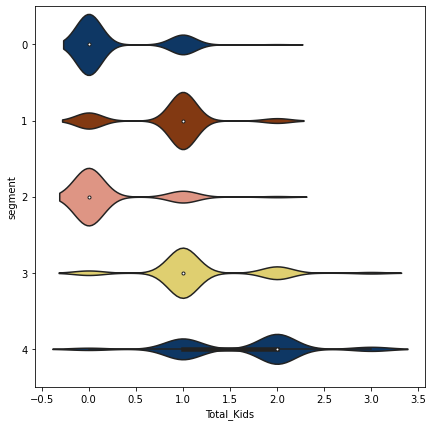

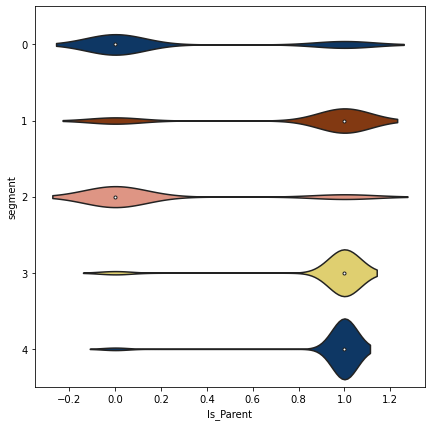

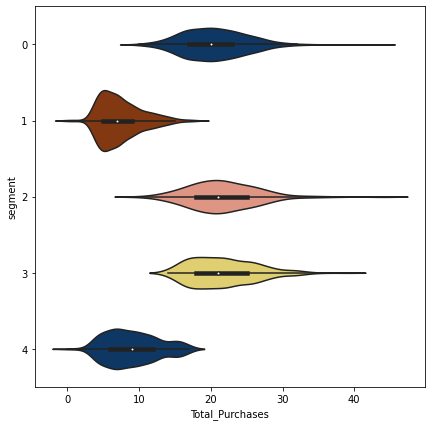

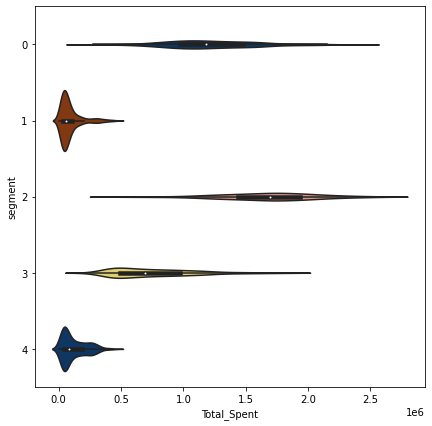

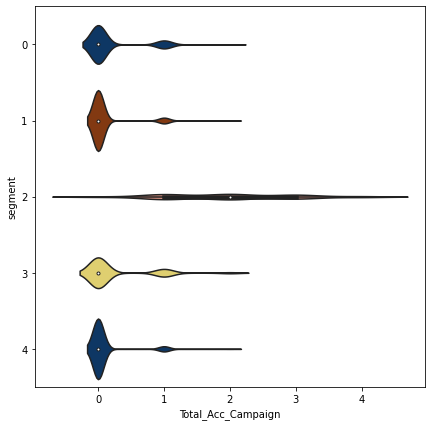

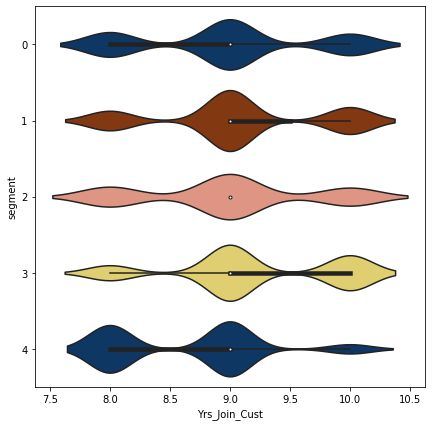

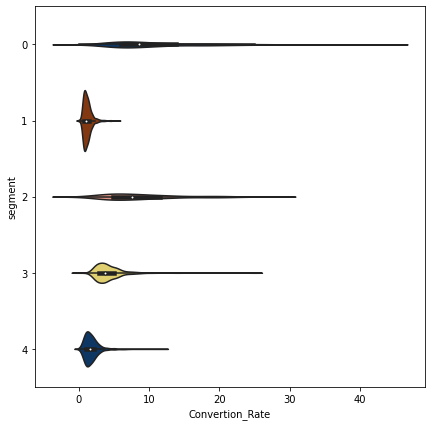

In [ ]:
palette = ['#003672', '#943400', '#ED8B75', '#F2DC5D', '#0E9594']

for column in num_cols:
    plt.figure(figsize=(7,7))
    sns.violinplot(y=df['segment'], x=df[column], palette=palette[:-1], orient="h")
    plt.show();

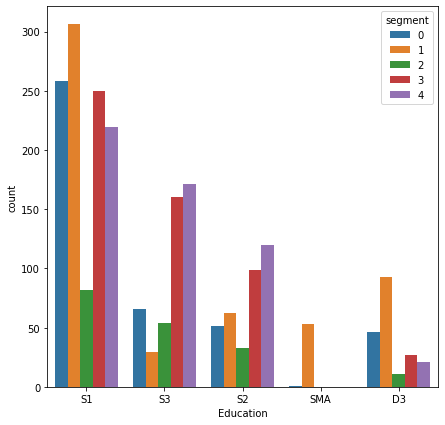

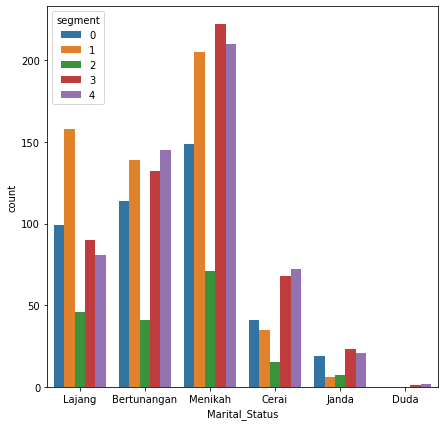

In [ ]:
for column in object_cols:
    plt.figure(figsize=(7,7))
    sns.countplot(x=df[column], hue=df['segment'])
    plt.show();

## Interpretasi

**Clustering Interpretations**

* Segment 2 is the most spending cluster in column total_spent
* The income, from the most paid to the less paid : 2 - 0 - 3 - 4 - 1
* There is no impact from recency on the cluster
* Cluster 2 are buy a lot in coke and meat product
* Clusters 0 and 2 are a lot in meat, fish, and fruits
* Cluster 0 is more than cluster 2 in fish and fruits products
* Discount has no much effect into number of purchases in every clusters. There are only cluster 3 and 4 that use the discount on their transaction, but not too much
* Clusters 0 and 3 buys a lot of items on the Internet
* Clusters 0 and 2 buys a lot of items with a Catalog
* Clusters 0, 2, and 3 buys a lot of items directly from the store
* Clusters 1, 3 and 4 spend a lot of time on the website, whereas cluster 0 and 2 barely do it
* In average, clusters 3 and 4 are the oldest (around 55), clusters 0 and 2 is slightly younger (around 50) and cluster 1 is the youngest (around 40)
* Clusters 0 and 2 mostly doesn't have any kid, clusters 1 and 3 in average have 1 kid, and clusters 4 in average have 2 kids
* Clusters 1, 3, annd 4 in average are a parent and the other clusters are not a parent
* Clusters 0, 2, and 3 in average are spend money more than cluster 1 and 4
* Cluster 2 spends about 1.75 amount (average) of products, second most is 0 and 3, and the others has never spending
* Cluster 2 is the only cluster that accept offers during campaign
* Clusters 0 and 2 have the highest conversion rate compared to others clusters

Customer Segmentation

**Business Insights**

1. The company should put some discount promo in website because cluster 3 and 4 are customers that mostly buy product from website and clusters that use discount promos the most
2. The company can push more campaign to customer in cluster 2 which customers with the most accept company's campaign. We can't use discount strategy to this cluster because they rarely buy discounted items
3. The company should make the store and catalog mostly features coke, fish, and fruits product 
